# Attack Double Spending

## 1) Importation des librairies et creation de fonction 

In [1]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def AouB(proba):
    Block=np.random.choice(('A','B'),p=[proba,1-proba])
    return Block


def Simulation(progression,proba,A_Retard,Z_Avance):
    R=0 # Reward
    Ha=0 # nombre de block Attaquant
    Hb=0 # nombre de block du réseau
    while ((progression != 0-A_Retard) and (progression != Z_Avance)):
        Tentative=AouB(proba)
        if Tentative =='A':
            R+=1
            Ha+=1
            progression+=1
        else:
            progression-=1
            Hb+=1
    if progression == Z_Avance:
        return R,Ha,Ha
    else:
        return 0,Hb,-Hb

def Résultat(nombre=5,progression=1,proba=0.5,A_Retard=3,Z_Avance=2):
    ER=0
    EH=0
    Miner=[]
    for i in range(nombre):
        R,H,M = Simulation(progression,proba,A_Retard,Z_Avance)
        Miner.append(M)
        ER+=R
        EH+=H
    return ER,EH,Miner

def Rendement(ER,EH,proba):
    R_exp=ER/EH
    return R_exp


## 2) Impact sur la longueur de la chain du réseau

#### a) Parameters

In [3]:
#Paramètres
nombre=10000 # Nombre de Simulation
progression=1 # avancement départ de l'Attaquant
L_proba=np.arange(0.01,0.51,0.01)
#Values
ER_Z2_A3=[]
EH_Z2_A3=[]
Miner_Z2_A3=[]
ER_Z2_A5=[]
EH_Z2_A5=[]
Miner_Z2_A5=[]
ER_Z2_A10=[]
EH_Z2_A10=[]
Miner_Z2_A10=[]
#Rendement
L_Rdt_Exp_Z2_A3=[]
L_Rdt_Exp_Z2_A5=[]
L_Rdt_Exp_Z2_A10=[]

for i in L_proba:
    er_Z2_A3,eh_Z2_A3,M_Z2_A3 = Résultat(nombre,progression,i,3,2)
    ER_Z2_A3.append(er_Z2_A3)
    EH_Z2_A3.append(eh_Z2_A3)
    Miner_Z2_A3.append(M_Z2_A3)
    R_Exp_Z2_A3 = Rendement(er_Z2_A3,eh_Z2_A3,i)
    L_Rdt_Exp_Z2_A3.append(R_Exp_Z2_A3)
    
    er_Z2_A5,eh_Z2_A5,M_Z2_A5 = Résultat(nombre,progression,i,5,2)
    ER_Z2_A5.append(er_Z2_A5)
    EH_Z2_A5.append(eh_Z2_A5)
    Miner_Z2_A5.append(M_Z2_A5)
    R_Exp_Z2_A5 = Rendement(er_Z2_A5,eh_Z2_A5,i)
    L_Rdt_Exp_Z2_A5.append(R_Exp_Z2_A5)
    
    er_Z2_A10,eh_Z2_A10,M_Z2_A10 = Résultat(nombre,progression,i,10,2)
    ER_Z2_A10.append(er_Z2_A10)
    EH_Z2_A10.append(eh_Z2_A10)
    Miner_Z2_A10.append(M_Z2_A10)
    R_Exp_Z2_A10 = Rendement(er_Z2_A10,eh_Z2_A10,i)
    L_Rdt_Exp_Z2_A10.append(R_Exp_Z2_A10)

#### b) Seuil de Rentabilité

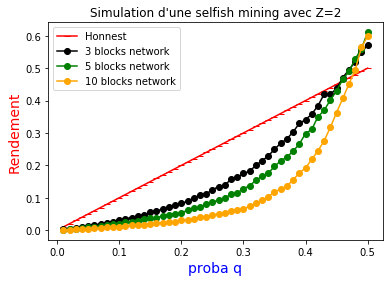

In [4]:
fig,ax=plt.subplots()
plt.title('Simulation d\'une selfish mining avec Z=2')
ax.plot(L_proba,L_proba,marker="_",color='red')
ax.plot(L_proba,L_Rdt_Exp_Z2_A3,marker="o",color='black')
ax.plot(L_proba,L_Rdt_Exp_Z2_A5,marker="o",color='green')
ax.plot(L_proba,L_Rdt_Exp_Z2_A10,marker="o",color='orange')
ax.legend(['Honnest','3 blocks network','5 blocks network','10 blocks network'])
ax.set_xlabel("proba q",color="blue",fontsize=14)
ax.set_ylabel("Rendement",color="red",fontsize=14)
idx_R_Exp_Z2_A3 = np.argwhere(np.diff(np.sign(L_proba - L_Rdt_Exp_Z2_A3))).flatten() #index intersection Z=2 A=3 
idx_R_Exp_Z2_A5 = np.argwhere(np.diff(np.sign(L_proba - L_Rdt_Exp_Z2_A5))).flatten() #index intersection Z=2 A=5 
idx_R_Exp_Z2_A10 = np.argwhere(np.diff(np.sign(L_proba - L_Rdt_Exp_Z2_A10))).flatten() #index intersection Z=2 A=10 

plt.show()

In [9]:
print("Valeur min de Rdt Z=2 A=3 => ",L_proba[idx_R_Exp_Z2_A3[0]])
print("Valeur min de Rdt Z=2 A=5 => ",L_proba[idx_R_Exp_Z2_A5[0]])
print("Valeur min de Rdt Z=2 A=10 => ",L_proba[idx_R_Exp_Z2_A10[0]])

Valeur min de Rdt Z=2 A=3 =>  0.44
Valeur min de Rdt Z=2 A=5 =>  0.46
Valeur min de Rdt Z=2 A=10 =>  0.47000000000000003


#### c) autres stats

In [10]:
def BlockTeam(M):
    TeamA=0
    TeamB=0
    for i in M:
        if i>0:
            TeamA+=i
        else:
            TeamB+=abs(i)
    return TeamA,TeamB

In [11]:
TeamA_Z2_A3=[]
TeamB_Z2_A3=[]
TeamA_Z2_A5=[]
TeamB_Z2_A5=[]
TeamA_Z2_A10=[]
TeamB_Z2_A10=[]
for index in range(len(Miner_Z2_A3)):
    TA_Z2_A3,TB_Z2_A3 = BlockTeam(Miner_Z2_A3[index])
    TeamA_Z2_A3.append(TA_Z2_A3)
    TeamB_Z2_A3.append(TB_Z2_A3)
    TA_Z2_A5,TB_Z2_A5 = BlockTeam(Miner_Z2_A5[index])
    TeamA_Z2_A5.append(TA_Z2_A5)
    TeamB_Z2_A5.append(TB_Z2_A5)
    TA_Z2_A10,TB_Z2_A10 = BlockTeam(Miner_Z2_A10[index])
    TeamA_Z2_A10.append(TA_Z2_A10)
    TeamB_Z2_A10.append(TB_Z2_A10)

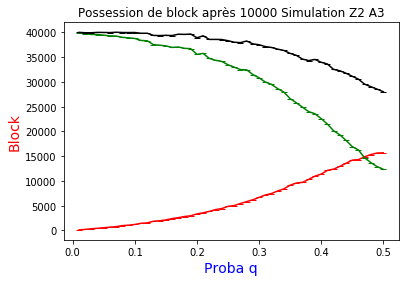

In [12]:
fig,ax=plt.subplots()
plt.title('Possession de block après '+str(nombre)+' Simulation Z2 A3')
ax.plot(L_proba,TeamA_Z2_A3,marker="_",color='red')
ax.plot(L_proba,TeamB_Z2_A3,marker="_",color='green')
ax.plot(L_proba,EH_Z2_A3,marker="_",color='black')
ax.set_xlabel("Proba q",color="blue",fontsize=14)
ax.set_ylabel("Block",color="red",fontsize=14)
plt.show()

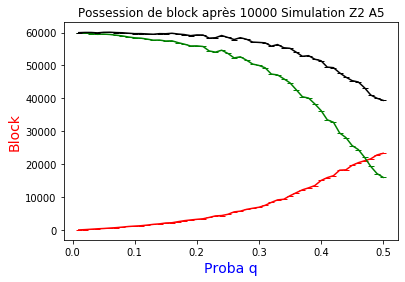

In [13]:
fig,ax=plt.subplots()
plt.title('Possession de block après '+str(nombre)+' Simulation Z2 A5')
ax.plot(L_proba,TeamA_Z2_A5,marker="_",color='red')
ax.plot(L_proba,TeamB_Z2_A5,marker="_",color='green')
ax.plot(L_proba,EH_Z2_A5,marker="_",color='black')
ax.set_xlabel("Proba q",color="blue",fontsize=14)
ax.set_ylabel("Block",color="red",fontsize=14)
plt.show()

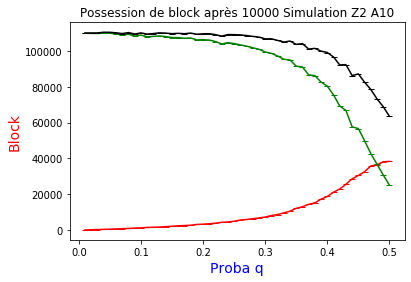

In [14]:
fig,ax=plt.subplots()
plt.title('Possession de block après '+str(nombre)+' Simulation Z2 A10')
ax.plot(L_proba,TeamA_Z2_A10,marker="_",color='red')
ax.plot(L_proba,TeamB_Z2_A10,marker="_",color='green')
ax.plot(L_proba,EH_Z2_A10,marker="_",color='black')
ax.set_xlabel("Proba q",color="blue",fontsize=14)
ax.set_ylabel("Block",color="red",fontsize=14)
plt.show()

In [15]:
RatioBlockA_Z2_A3=[]
RatioBlockB_Z2_A3=[]
for index in range(len(EH_Z2_A3)):
    RatioBlockA_Z2_A3.append(TeamA_Z2_A3[index]/EH_Z2_A3[index])
    RatioBlockB_Z2_A3.append(TeamB_Z2_A3[index]/EH_Z2_A3[index])

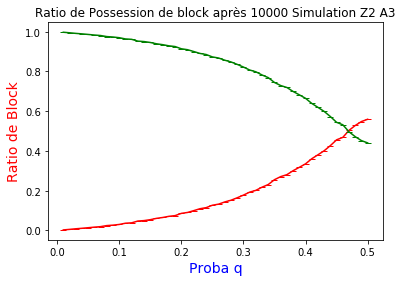

In [16]:
fig,ax=plt.subplots()
plt.title('Ratio de Possession de block après '+str(nombre)+' Simulation Z2 A3')
ax.plot(L_proba,RatioBlockA_Z2_A3,marker="_",color='red')
ax.plot(L_proba,RatioBlockB_Z2_A3,marker="_",color='green')
ax.set_xlabel("Proba q",color="blue",fontsize=14)
ax.set_ylabel("Ratio de Block",color="red",fontsize=14)

plt.show()

In [17]:
RatioBlockA_Z2_A5=[]
RatioBlockB_Z2_A5=[]
for index in range(len(EH_Z2_A5)):
    RatioBlockA_Z2_A5.append(TeamA_Z2_A5[index]/EH_Z2_A5[index])
    RatioBlockB_Z2_A5.append(TeamB_Z2_A5[index]/EH_Z2_A5[index])

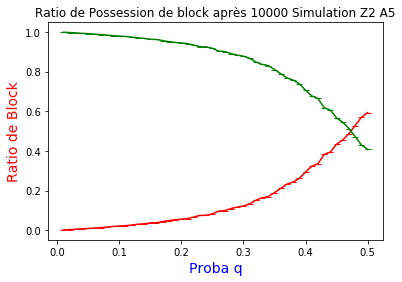

In [18]:
fig,ax=plt.subplots()
plt.title('Ratio de Possession de block après '+str(nombre)+' Simulation Z2 A5')
ax.plot(L_proba,RatioBlockA_Z2_A5,marker="_",color='red')
ax.plot(L_proba,RatioBlockB_Z2_A5,marker="_",color='green')
ax.set_xlabel("Proba q",color="blue",fontsize=14)
ax.set_ylabel("Ratio de Block",color="red",fontsize=14)

plt.show()

In [19]:
RatioBlockA_Z2_A10=[]
RatioBlockB_Z2_A10=[]
for index in range(len(EH_Z2_A10)):
    RatioBlockA_Z2_A10.append(TeamA_Z2_A10[index]/EH_Z2_A10[index])
    RatioBlockB_Z2_A10.append(TeamB_Z2_A10[index]/EH_Z2_A10[index])

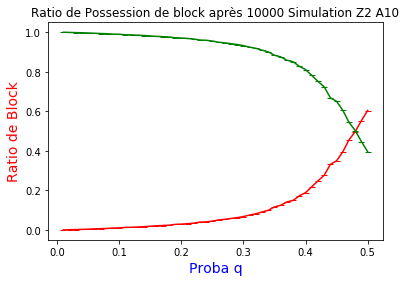

In [20]:
fig,ax=plt.subplots()
plt.title('Ratio de Possession de block après '+str(nombre)+' Simulation Z2 A10')
ax.plot(L_proba,RatioBlockA_Z2_A10,marker="_",color='red')
ax.plot(L_proba,RatioBlockB_Z2_A10,marker="_",color='green')
ax.set_xlabel("Proba q",color="blue",fontsize=14)
ax.set_ylabel("Ratio de Block",color="red",fontsize=14)

plt.show()

In [21]:
RewardParSimulationA_Z2_A3=[]
for index in range(len(ER_Z2_A3)):
    RewardParSimulationA_Z2_A3.append(ER_Z2_A3[index]/nombre)

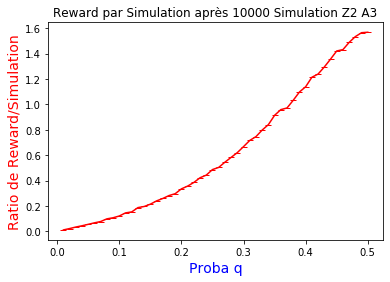

In [22]:
fig,ax=plt.subplots()
plt.title('Reward par Simulation après '+str(nombre)+' Simulation Z2 A3')
ax.plot(L_proba,RewardParSimulationA_Z2_A3,marker="_",color='red')
ax.set_xlabel("Proba q",color="blue",fontsize=14)
ax.set_ylabel("Ratio de Reward/Simulation",color="red",fontsize=14)

plt.show()

In [23]:
RewardParSimulationA_Z2_A5=[]
for index in range(len(ER_Z2_A5)):
    RewardParSimulationA_Z2_A5.append(ER_Z2_A5[index]/nombre)

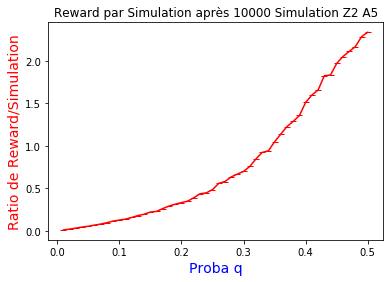

In [24]:
fig,ax=plt.subplots()
plt.title('Reward par Simulation après '+str(nombre)+' Simulation Z2 A5')
ax.plot(L_proba,RewardParSimulationA_Z2_A5,marker="_",color='red')
ax.set_xlabel("Proba q",color="blue",fontsize=14)
ax.set_ylabel("Ratio de Reward/Simulation",color="red",fontsize=14)

plt.show()

In [25]:
RewardParSimulationA_Z2_A10=[]
for index in range(len(ER_Z2_A10)):
    RewardParSimulationA_Z2_A10.append(ER_Z2_A10[index]/nombre)

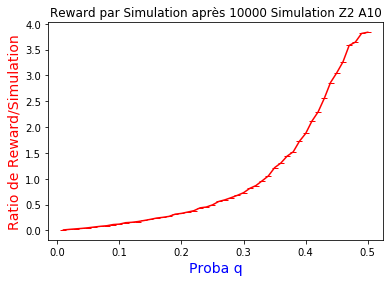

In [26]:
fig,ax=plt.subplots()
plt.title('Reward par Simulation après '+str(nombre)+' Simulation Z2 A10')
ax.plot(L_proba,RewardParSimulationA_Z2_A10,marker="_",color='red')
ax.set_xlabel("Proba q",color="blue",fontsize=14)
ax.set_ylabel("Ratio de Reward/Simulation",color="red",fontsize=14)

plt.show()

# 3) Impact sur la longueur de la chaine du miner

#### a) Parameters

In [27]:
#Paramètres
nombre=10000 # Nombre de Simulation
progression=1 # avancement départ de l'Attaquant
L_proba=np.arange(0.01,0.51,0.01)
#Values
ER_Z2_A5=[]
EH_Z2_A5=[]
Miner_Z2_A5=[]
ER_Z5_A5=[]
EH_Z5_A5=[]
Miner_Z5_A5=[]
ER_Z10_A5=[]
EH_Z10_A5=[]
Miner_Z10_A5=[]
#Rendement
L_Rdt_Exp_Z2_A5=[]
L_Rdt_Exp_Z5_A5=[]
L_Rdt_Exp_Z10_A5=[]

for i in L_proba:
    er_Z2_A5,eh_Z2_A5,M_Z2_A5 = Résultat(nombre,progression,i,5,2)
    ER_Z2_A5.append(er_Z2_A5)
    EH_Z2_A5.append(eh_Z2_A5)
    Miner_Z2_A5.append(M_Z2_A5)
    R_Exp_Z2_A5 = Rendement(er_Z2_A5,eh_Z2_A5,i)
    L_Rdt_Exp_Z2_A5.append(R_Exp_Z2_A5)
    
    er_Z5_A5,eh_Z5_A5,M_Z5_A5 = Résultat(nombre,progression,i,5,5)
    ER_Z5_A5.append(er_Z5_A5)
    EH_Z5_A5.append(eh_Z5_A5)
    Miner_Z5_A5.append(M_Z5_A5)
    R_Exp_Z5_A5 = Rendement(er_Z5_A5,eh_Z5_A5,i)
    L_Rdt_Exp_Z5_A5.append(R_Exp_Z5_A5)
    
    er_Z10_A5,eh_Z10_A5,M_Z10_A5 = Résultat(nombre,progression,i,5,10)
    ER_Z10_A5.append(er_Z10_A5)
    EH_Z10_A5.append(eh_Z10_A5)
    Miner_Z10_A5.append(M_Z10_A5)
    R_Exp_Z10_A5 = Rendement(er_Z10_A5,eh_Z10_A5,i)
    L_Rdt_Exp_Z10_A5.append(R_Exp_Z10_A5)

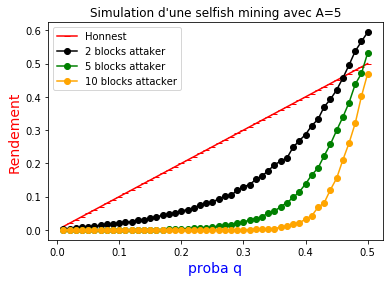

In [49]:
fig,ax=plt.subplots()
plt.title('Simulation d\'une selfish mining avec A=5')
ax.plot(L_proba,L_proba,marker="_",color='red')
ax.plot(L_proba,L_Rdt_Exp_Z2_A5,marker="o",color='black')
ax.plot(L_proba,L_Rdt_Exp_Z5_A5,marker="o",color='green')
ax.plot(L_proba,L_Rdt_Exp_Z10_A5,marker="o",color='orange')
ax.legend(['Honnest','2 blocks attaker','5 blocks attaker','10 blocks attacker'])
ax.set_xlabel("proba q",color="blue",fontsize=14)
ax.set_ylabel("Rendement",color="red",fontsize=14)
idx_R_Exp_Z2_A5 = np.argwhere(np.diff(np.sign(L_proba - L_Rdt_Exp_Z2_A5))).flatten() #index intersection Z=2 A=5 
idx_R_Exp_Z5_A5 = np.argwhere(np.diff(np.sign(L_proba - L_Rdt_Exp_Z5_A5))).flatten() #index intersection Z=5 A=5 
idx_R_Exp_Z10_A5 = np.argwhere(np.diff(np.sign(L_proba - L_Rdt_Exp_Z10_A5))).flatten() #index intersection Z=10 A=5 

plt.show()

In [29]:
print("Valeur min de Rdt Z=2 A=5 => ",L_proba[idx_R_Exp_Z2_A5[0]])
print("Valeur min de Rdt Z=5 A=5 => ",L_proba[idx_R_Exp_Z5_A5[0]])
print("Valeur min de Rdt Z=10 A=5 => ",L_proba[idx_R_Exp_Z10_A5[0]])

Valeur min de Rdt Z=2 A=5 =>  0.46
Valeur min de Rdt Z=5 A=5 =>  0.49


IndexError: index 0 is out of bounds for axis 0 with size 0

#### b) Seuil de Rentabilité

#### c) Autres Stats

In [30]:
TeamA_Z2_A5=[]
TeamB_Z2_A5=[]
TeamA_Z5_A5=[]
TeamB_Z5_A5=[]
TeamA_Z10_A5=[]
TeamB_Z10_A5=[]
for index in range(len(Miner_Z2_A5)):
    TA_Z2_A5,TB_Z2_A5 = BlockTeam(Miner_Z2_A5[index])
    TeamA_Z2_A5.append(TA_Z2_A5)
    TeamB_Z2_A5.append(TB_Z2_A5)
    TA_Z5_A5,TB_Z5_A5 = BlockTeam(Miner_Z5_A5[index])
    TeamA_Z5_A5.append(TA_Z5_A5)
    TeamB_Z5_A5.append(TB_Z5_A5)
    TA_Z10_A5,TB_Z10_A5 = BlockTeam(Miner_Z10_A5[index])
    TeamA_Z10_A5.append(TA_Z10_A5)
    TeamB_Z10_A5.append(TB_Z10_A5)

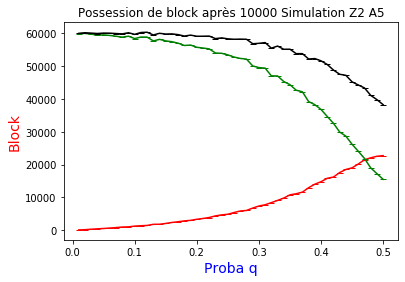

In [31]:
fig,ax=plt.subplots()
plt.title('Possession de block après '+str(nombre)+' Simulation Z2 A5')
ax.plot(L_proba,TeamA_Z2_A5,marker="_",color='red')
ax.plot(L_proba,TeamB_Z2_A5,marker="_",color='green')
ax.plot(L_proba,EH_Z2_A5,marker="_",color='black')
ax.set_xlabel("Proba q",color="blue",fontsize=14)
ax.set_ylabel("Block",color="red",fontsize=14)
plt.show()

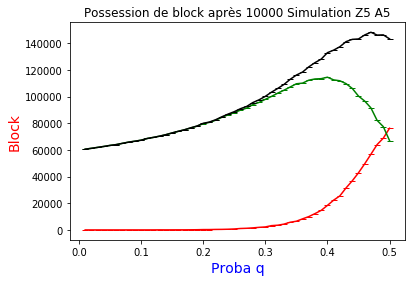

In [32]:
fig,ax=plt.subplots()
plt.title('Possession de block après '+str(nombre)+' Simulation Z5 A5')
ax.plot(L_proba,TeamA_Z5_A5,marker="_",color='red')
ax.plot(L_proba,TeamB_Z5_A5,marker="_",color='green')
ax.plot(L_proba,EH_Z5_A5,marker="_",color='black')
ax.set_xlabel("Proba q",color="blue",fontsize=14)
ax.set_ylabel("Block",color="red",fontsize=14)
plt.show()

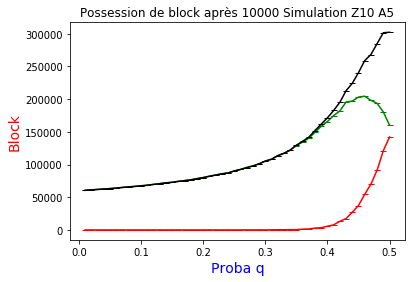

In [33]:
fig,ax=plt.subplots()
plt.title('Possession de block après '+str(nombre)+' Simulation Z10 A5')
ax.plot(L_proba,TeamA_Z10_A5,marker="_",color='red')
ax.plot(L_proba,TeamB_Z10_A5,marker="_",color='green')
ax.plot(L_proba,EH_Z10_A5,marker="_",color='black')
ax.set_xlabel("Proba q",color="blue",fontsize=14)
ax.set_ylabel("Block",color="red",fontsize=14)
plt.show()

In [36]:
RatioBlockA_Z2_A5=[]
RatioBlockB_Z2_A5=[]
for index in range(len(EH_Z2_A5)):
    RatioBlockA_Z2_A5.append(TeamA_Z2_A5[index]/EH_Z2_A5[index])
    RatioBlockB_Z2_A5.append(TeamB_Z2_A5[index]/EH_Z2_A5[index])

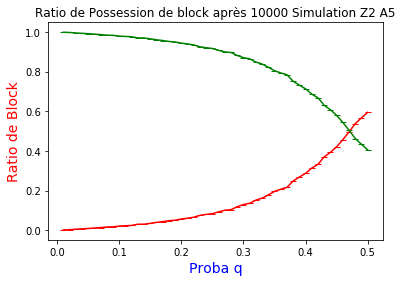

In [37]:
fig,ax=plt.subplots()
plt.title('Ratio de Possession de block après '+str(nombre)+' Simulation Z2 A5')
ax.plot(L_proba,RatioBlockA_Z2_A5,marker="_",color='red')
ax.plot(L_proba,RatioBlockB_Z2_A5,marker="_",color='green')
ax.set_xlabel("Proba q",color="blue",fontsize=14)
ax.set_ylabel("Ratio de Block",color="red",fontsize=14)

plt.show()

In [38]:
RatioBlockA_Z5_A5=[]
RatioBlockB_Z5_A5=[]
for index in range(len(EH_Z5_A5)):
    RatioBlockA_Z5_A5.append(TeamA_Z5_A5[index]/EH_Z5_A5[index])
    RatioBlockB_Z5_A5.append(TeamB_Z5_A5[index]/EH_Z5_A5[index])

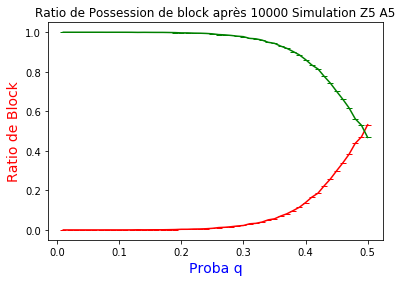

In [39]:
fig,ax=plt.subplots()
plt.title('Ratio de Possession de block après '+str(nombre)+' Simulation Z5 A5')
ax.plot(L_proba,RatioBlockA_Z5_A5,marker="_",color='red')
ax.plot(L_proba,RatioBlockB_Z5_A5,marker="_",color='green')
ax.set_xlabel("Proba q",color="blue",fontsize=14)
ax.set_ylabel("Ratio de Block",color="red",fontsize=14)

plt.show()

In [40]:
RatioBlockA_Z10_A5=[]
RatioBlockB_Z10_A5=[]
for index in range(len(EH_Z10_A5)):
    RatioBlockA_Z10_A5.append(TeamA_Z10_A5[index]/EH_Z10_A5[index])
    RatioBlockB_Z10_A5.append(TeamB_Z10_A5[index]/EH_Z10_A5[index])

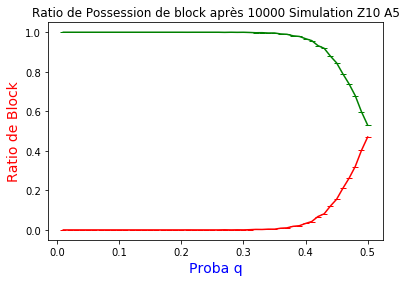

In [41]:
fig,ax=plt.subplots()
plt.title('Ratio de Possession de block après '+str(nombre)+' Simulation Z10 A5')
ax.plot(L_proba,RatioBlockA_Z10_A5,marker="_",color='red')
ax.plot(L_proba,RatioBlockB_Z10_A5,marker="_",color='green')
ax.set_xlabel("Proba q",color="blue",fontsize=14)
ax.set_ylabel("Ratio de Block",color="red",fontsize=14)

plt.show()

In [42]:
RewardParSimulationA_Z2_A5=[]
for index in range(len(ER_Z2_A5)):
    RewardParSimulationA_Z2_A5.append(ER_Z2_A5[index]/nombre)

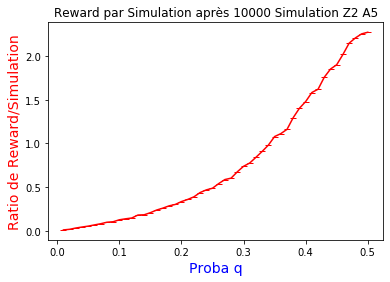

In [43]:
fig,ax=plt.subplots()
plt.title('Reward par Simulation après '+str(nombre)+' Simulation Z2 A5')
ax.plot(L_proba,RewardParSimulationA_Z2_A5,marker="_",color='red')
ax.set_xlabel("Proba q",color="blue",fontsize=14)
ax.set_ylabel("Ratio de Reward/Simulation",color="red",fontsize=14)

plt.show()

In [44]:
RewardParSimulationA_Z5_A5=[]
for index in range(len(ER_Z5_A5)):
    RewardParSimulationA_Z5_A5.append(ER_Z5_A5[index]/nombre)

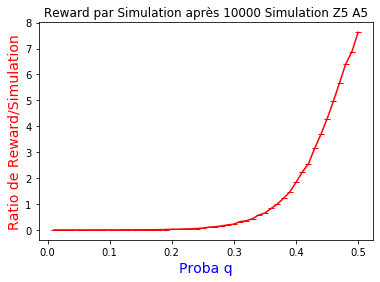

In [45]:
fig,ax=plt.subplots()
plt.title('Reward par Simulation après '+str(nombre)+' Simulation Z5 A5')
ax.plot(L_proba,RewardParSimulationA_Z5_A5,marker="_",color='red')
ax.set_xlabel("Proba q",color="blue",fontsize=14)
ax.set_ylabel("Ratio de Reward/Simulation",color="red",fontsize=14)

plt.show()

In [46]:
RewardParSimulationA_Z10_A5=[]
for index in range(len(ER_Z10_A5)):
    RewardParSimulationA_Z10_A5.append(ER_Z10_A5[index]/nombre)

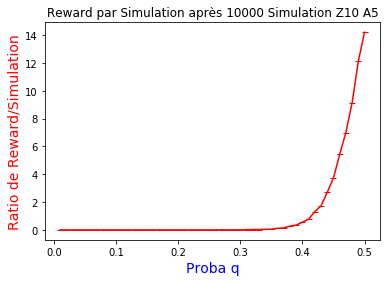

In [47]:
fig,ax=plt.subplots()
plt.title('Reward par Simulation après '+str(nombre)+' Simulation Z10 A5')
ax.plot(L_proba,RewardParSimulationA_Z10_A5,marker="_",color='red')
ax.set_xlabel("Proba q",color="blue",fontsize=14)
ax.set_ylabel("Ratio de Reward/Simulation",color="red",fontsize=14)

plt.show()